![title](h20.png)

  #        - by Team absolute wateR
  ##             (Ketan, Maithili,Rohit)

## The following program explores some of the basic utilities the h2o package and builds  advanced machine learning models available with this package

In [ ]:
#install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/rel-shannon/26/R")))

### H2O can be initialized in many ways depending on the infrastructure
### Single Machine
### Multi Node(Distributed System like Spark or Hadoop )

In [12]:
h2o.init(ip = 'localhost', port = 54321, max_mem_size = '2g')


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\rohit\AppData\Local\Temp\RtmpGGKcC9/h2o_rohit_started_from_r.out
    C:\Users\rohit\AppData\Local\Temp\RtmpGGKcC9/h2o_rohit_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         3 seconds 636 milliseconds 
    H2O cluster version:        3.10.0.8 
    H2O cluster version age:    2 days  
    H2O cluster name:           H2O_started_from_R_rohit_aok445 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.78 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.1.3 (2015-03-09) 

Note:  As started, H2O is limited to the CRAN default of 2 CPUs.
      

## Load the data set into a variable, here a key/value pair is being created for the dataset which is stored in H2O. We will be using R as an interface to perform operations on it

In [13]:
loanpath = "C:/Users/rohit/Documents/RClassWork/Project1"
loan.hex = h2o.importFile(path = loanpath,destination_frame = "loan.hex")

  |======================================================================| 100%


## Data exploration

### To view top 5 rows in our data frame

In [17]:
head(loan.hex,5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
1,38098114,40860827,15000,15000,15000,60 months,0.1239,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000,Source Verified,1.41741e+12,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=38098114,NA,debt_consolidation,Debt consolidation,235xx,VA,12.03,0,775713600000,0,NaN,NaN,6,0,138008,0.29,17,w,0,0,17392.37,17392.37,15000,2392.37,0,0,0,1.464754e+12,12017.81,NaN,1.470024e+12,0,NaN,1,INDIVIDUAL,NaN,NaN,NA,0,0,149140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500,NaN,NaN,NaN,5,29828,9525,4.7,0,0,103,244,1,1,0,47,NaN,NaN,NaN,0,1,4,1,2,8,5,9,4,6,0,0,0,4,100,0,0,0,196500,149140,10000,12000
2,36805548,39558264,10400,10400,10400,36 months,0.0699,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000,Not Verified,1.41741e+12,Late (31-120 days),n,https://lendingclub.com/browse/loanDetail.action?loan_id=36805548,NA,credit_card,Credit card refinancing,937xx,CA,14.92,0,620625600000,2,42,NaN,17,0,6133,0.316,36,w,5182.25,5182.25,6090.42,6090.42,5217.75,872.67,0,0,0,1.470024e+12,321.08,1.475294e+12,1.472702e+12,0,59,1,INDIVIDUAL,NaN,NaN,NA,0,0,162110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400,NaN,NaN,NaN,7,9536,7599,41.5,0,0,76,290,1,1,1,5,42,1,42,4,6,9,7,18,2,14,32,9,17,0,0,0,4,83.3,14.3,0,0,179407,15030,13000,11325
3,37822187,40585251,9600,9600,9600,36 months,0.1366,326.53,C,C3,Admin Specialist,10+ years,RENT,69000,Source Verified,1.41741e+12,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=37822187,NA,debt_consolidation,Debt consolidation,077xx,NJ,25.81,0,7.20594e+11,0,NaN,NaN,12,0,16388,0.594,44,f,0,0,9973.43,9973.43,9600,373.43,0,0,0,1.427861e+12,9338.58,NaN,1.472702e+12,0,NaN,1,INDIVIDUAL,NaN,NaN,NA,0,0,38566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27600,NaN,NaN,NaN,8,3214,6494,69.2,0,0,183,265,23,3,0,24,NaN,17,NaN,0,4,7,5,16,17,8,26,7,12,0,0,0,3,100,60,0,0,52490,38566,21100,24890
4,37612354,40375473,12800,12800,12800,60 months,0.1714,319.08,D,D4,Senior Sales Professional,10+ years,MORTGAGE,125000,Verified,1.41741e+12,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=37612354,NA,car,Car financing,953xx,CA,8.31,1,970372800000,0,17,NaN,8,0,5753,1.009,13,w,9671.46,9671.46,6421.47,6421.47,3128.54,3292.93,0,0,0,1.472702e+12,389.42,1.475294e+12,1.472702e+12,0,36,1,INDIVIDUAL,NaN,NaN,NA,0,0,261815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700,NaN,NaN,NaN,2,32727,0,103.2,0,0,16,170,21,16,5,21,17,1,17,1,3,5,3,5,1,5,7,5,8

### Total number of rows

In [15]:
nrow(loan.hex)

[1] 656724

### To convert a H2O data frame into a R dataframe/object

In [16]:
loan.R = as.data.frame(loan.hex)

Warning message:
In scan(file, what, nmax, sep, dec, quote, skip, nlines, na.strings, : EOF within quoted string

### To find the class of any object

In [18]:
class(loan.hex)

[1] "H2OFrame"

### To find the column names in our data frame

In [19]:
names(loan.hex)

[1] "id"                             "member_id"                     
  [3] "loan_amnt"                      "funded_amnt"                   
  [5] "funded_amnt_inv"                "term"                          
  [7] "int_rate"                       "installment"                   
  [9] "grade"                          "sub_grade"                     
 [11] "emp_title"                      "emp_length"                    
 [13] "home_ownership"                 "annual_inc"                    
 [15] "verification_status"            "issue_d"                       
 [17] "loan_status"                    "pymnt_plan"                    
 [19] "url"                            "desc"                          
 [21] "purpose"                        "title"                         
 [23] "zip_code"                       "addr_state"                    
 [25] "dti"                            "delinq_2yrs"                   
 [27] "earliest_cr_line"               "inq_last_6mths"                
 [29] "mths_since_last_delinq"         "mths_since_last_record"        
 [31] "open_acc"                       "pub_rec"                       
 [33] "revol_bal"                      "revol_util"                    
 [35] "total_acc"                      "initial_list_status"           
 [37] "out_prncp"                      "out_prncp_inv"                 
 [39] "total_pymnt"                    "total_pymnt_inv"               
 [41] "total_rec_prncp"                "total_rec_int"                 
 [43] "total_rec_late_fee"             "recoveries"                    
 [45] "collection_recovery_fee"        "last_pymnt_d"                  
 [47] "last_pymnt_amnt"                "next_pymnt_d"                  
 [49] "last_credit_pull_d"             "collections_12_mths_ex_med"    
 [51] "mths_since_last_major_derog"    "policy_code"                   
 [53] "application_type"               "annual_inc_joint"              
 [55] "dti_joint"                      "verification_status_joint"     
 [57] "acc_now_delinq"                 "tot_coll_amt"                  
 [59] "tot_cur_bal"                    "open_acc_6m"                   
 [61] "open_il_6m"                     "open_il_12m"                   
 [63] "open_il_24m"                    "mths_since_rcnt_il"            
 [65] "total_bal_il"                   "il_util"                       
 [67] "open_rv_12m"                    "open_rv_24m"                   
 [69] "max_bal_bc"                     "all_util"                      
 [71] "total_rev_hi_lim"               "inq_fi"                        
 [73] "total_cu_tl"                    "inq_last_12m"                  
 [75] "acc_open_past_24mths"           "avg_cur_bal"                   
 [77] "bc_open_to_buy"                 "bc_util"                       
 [79] "chargeoff_within_12_mths"       "delinq_amnt"                   
 [81] "mo_sin_old_il_acct"             "mo_sin_old_rev_tl_op"          
 [83] "mo_sin_rcnt_rev_tl_op"          "mo_sin_rcnt_tl"                
 [85] "mort_acc"                       "mths_since_recent_bc"          
 [87] "mths_since_recent_bc_dlq"       "mths_since_recent_inq"         
 [89] "mths_since_recent_revol_delinq" "num_accts_ever_120_pd"         
 [91] "num_actv_bc_tl"                 "num_actv_rev_tl"               
 [93] "num_bc_sats"                    "num_bc_tl"                     
 [95] "num_il_tl"                      "num_op_rev_tl"                 
 [97] "num_rev_accts"                  "num_rev_tl_bal_gt_0"           
 [99] "num_sats"                       "num_tl_120dpd_2m"              
[101] "num_tl_30dpd"                   "num_tl_90g_dpd_24m"            
[103] "num_tl_op_past_12m"             "pct_tl_nvr_dlq"                
[105] "percent_bc_gt_75"               "pub_rec_bankruptcies"          
[107] "tax_liens"                      "tot_hi_cred_lim"               
[109] "total_bal_ex_mort"              "total_bc_limit"                
[111] "total_il_high_credit_limit"

### To find the summary, quantiles and factor levels in our dataset

In [58]:
summary(loan.hex[,1:5], exact_quantiles = TRUE)

 id                 member_id          loan_amnt       funded_amnt    
 Min.   :   56705   Min.   :   70825   Min.   : 1000   Min.   : 1000  
 1st Qu.:27620486   1st Qu.:30105372   1st Qu.: 8450   1st Qu.: 8450  
 Median :44349687   Median :47387715   Median :13750   Median :13750  
 Mean   :42409647   Mean   :45548706   Mean   :15107   Mean   :15107  
 3rd Qu.:58553626   3rd Qu.:62394103   3rd Qu.:20000   3rd Qu.:20000  
 Max.   :68617057   Max.   :73544841   Max.   :35000   Max.   :35000  
 funded_amnt_inv
 Min.   :  900  
 1st Qu.: 8450  
 Median :13750  
 Mean   :15102  
 3rd Qu.:20000  
 Max.   :35000  

### The quantile distribution of any variable

In [21]:
loan.qs <- quantile(loan.hex$funded_amnt, probs = (1:10)/10)
loan.qs

10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
 5000  7500 10000 11500 13750 15775 19300 22500 28000 35000

### To plot the histogram for a variable

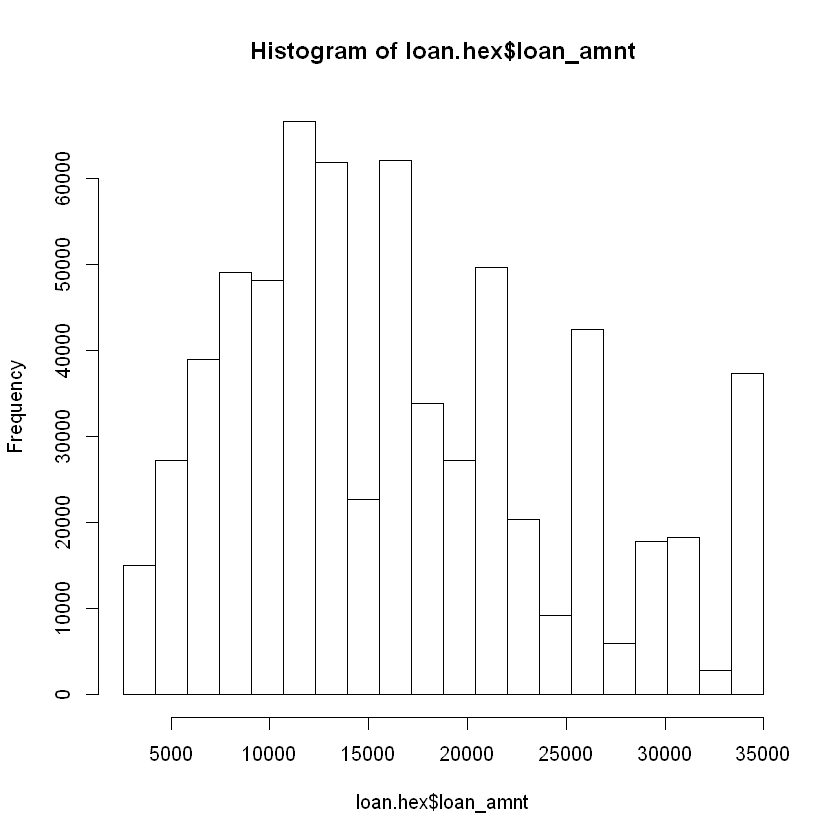

In [22]:
h2o.hist(loan.hex$loan_amnt)

### Missing value treatment - number of NA in our dataset

In [23]:
h2o.nacnt(loan.hex)

[1]      0      0      0      0      0      0      0      0      0      0
 [11]  37106      0      0      0      0      0      0      0      0 641417
 [21]      0    132      0      0      0      0      0      0 319843 540785
 [31]      0      0      0    287      0      0      0      0      0      0
 [41]      0      0      0      0      0    437      0 192661     35      0
 [51] 467517      0      0 656213 656215 656213      0      0      0 635352
 [61] 635352 635352 635352 635914 635352 638107 635352 635352 635352 635352
 [71]      0 635352 635352 635352      0      6   6408   6838      0      0
 [81]  19425      0      0      0      0   6044 485843  66291 420221      0
 [91]      0      0      0      0      0      0      1      0      0  27090
[101]      0      0      0      0   6796      0      0      0      0      0
[111]      0

In [53]:
cbind(colnames(loan.hex), h2o.nacnt(loan.hex))

id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,37106


In [25]:
loan.hex = loan.hex[h2o.nacnt(loan.hex)<(nrow(loan.hex)*0.25)]

### As per our analysis we found some set of columns as irrelevant to the target outcome, hence we are removing them and keeping what all are required

In [26]:
req_cols = c("id","addr_state",	"annual_inc",	"application_type",	"total_pymnt", "avg_cur_bal",	"collections_12_mths_ex_med",	"delinq_2yrs",	"dti",	"emp_length",	"emp_title",	"funded_amnt",	"home_ownership",	"inq_last_6mths",	"installment",	"int_rate",	"loan_amnt",	"mort_acc",	"open_acc",	"pub_rec",	"purpose",	"revol_bal",	"revol_util",	"term",	"tot_hi_cred_lim",	"total_acc",	"total_bal_ex_mort",	"verification_status",	"loan_status")


In [27]:
loan2.hex = loan.hex[colnames(loan.hex) %in% req_cols]

In [28]:
colnames(loan2.hex)

[1] "id"                         "loan_amnt"                 
 [3] "funded_amnt"                "term"                      
 [5] "int_rate"                   "installment"               
 [7] "emp_title"                  "emp_length"                
 [9] "home_ownership"             "annual_inc"                
[11] "verification_status"        "loan_status"               
[13] "purpose"                    "addr_state"                
[15] "dti"                        "delinq_2yrs"               
[17] "inq_last_6mths"             "open_acc"                  
[19] "pub_rec"                    "revol_bal"                 
[21] "revol_util"                 "total_acc"                 
[23] "total_pymnt"                "collections_12_mths_ex_med"
[25] "application_type"           "avg_cur_bal"               
[27] "mort_acc"                   "tot_hi_cred_lim"           
[29] "total_bal_ex_mort"

##Classifying target variable into a good or bad loan based on historical records

In [29]:
summary(loan2.hex$loan_status)

Warning message:
In summary.H2OFrame(loan2.hex$loan_status): Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.

 loan_status               
 Current           :439960 
 Fully Paid        :149224 
 Charged Off       : 43437 
 Late (31-120 days): 13514 
 In Grace Period   :  7698 
 Late (16-30 days) :  2788 

In [30]:
loan2.hex = loan2.hex[!(loan2.hex$loan_status %in% c("Current", "In Grace Period", "Late (16-30 days)")), ]
loan2.hex = loan2.hex[!is.na(loan2.hex$id),]
loan2.hex$bad_loan = loan2.hex$loan_status %in% c("Charged Off", "Default")
loan2.hex$bad_loan = as.factor(loan2.hex$bad_loan)

In [31]:
summary(loan2.hex$bad_loan)

Warning message:
In summary.H2OFrame(loan2.hex$bad_loan): Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.

 bad_loan 
 0:162738 
 1: 43540 

## Splitting dataset into train and test

In [32]:
# Splits data in prostate data frame with a ratio of 0.75
loan.split <- h2o.splitFrame(data = loan2.hex ,ratios = 0.75)
# Creates training set from 1st data set in split
loan.train <- loan.split[[1]]
# Creates testing set from 2st data set in split
loan.test <- loan.split[[2]]

## Building Models

In [33]:
target_loan = 'bad_loan'

explanatory_loan = c("addr_state","annual_inc","application_type","avg_cur_bal","collections_12_mths_ex_med",	"delinq_2yrs",	"dti",	"emp_length",	"emp_title",	"funded_amnt",	"home_ownership",	"inq_last_6mths",	"installment",	"int_rate",	"loan_amnt",	"mort_acc",	"open_acc",	"pub_rec",	"purpose",	"revol_bal",	"revol_util",	"term",	"tot_hi_cred_lim",	"total_acc",	"total_bal_ex_mort",	"verification_status")


### Gradient Boosting Machine

In [34]:
gbm_model_loan <- h2o.gbm(x = explanatory_loan, y = target_loan, training_frame = loan.train, validation_frame = loan.test, 
                          balance_classes = T,learn_rate = 0.05, score_each_iteration = T, ntrees = 100, max_depth = 4)


  |======================================================================| 100%


### Generalized Linear Model

In [35]:
glm_model_loan <- h2o.glm(x = explanatory_loan, y = target_loan, training_frame = loan.train, family = 'binomial',
                          nfolds=10,alpha = 0.5)

  |======================================================================| 100%


### Random Forests

In [ ]:
h2o.randomForest(x = explanatory_loan, y = target_loan, training_frame = loan.train, validation_frame = loan.test,
                    ntrees = 50, max_depth = 5,nfolds = 10)

### Deep Learning Model

In [ ]:
deeplearn_model_loan <- h2o.deeplearning(x = explanatory_loan, y = target_loan, training_frame = loan.train,validation_frame = loan.test)


## Model Accuracy and Performance

### Performance summary

In [36]:
h2o.performance(gbm_model_loan, newdata = loan.train)

H2OBinomialMetrics: gbm

MSE:  0.1498597
RMSE:  0.3871171
LogLoss:  0.4642893
Mean Per-Class Error:  0.3404381
AUC:  0.7201799
Gini:  0.4403598

Confusion Matrix for F1-optimal threshold:
           0     1    Error           Rate
0      80494 41502 0.340191  =41502/121996
1      11107 21495 0.340685   =11107/32602
Totals 91601 62997 0.340295  =52609/154598

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold    value idx
1                       max f1  0.227045 0.449691 211
2                       max f2  0.134548 0.613368 300
3                 max f0point5  0.317524 0.412497 129
4                 max accuracy  0.431266 0.792138  46
5                max precision  0.530390 0.748344   7
6                   max recall  0.028161 1.000000 398
7              max specificity  0.585604 0.999975   0
8             max absolute_mcc  0.252911 0.267836 187
9   max min_per_class_accuracy  0.227045 0.659315 211
10 max mean_per_class_accuracy  0.2

### To find AUC values

In [37]:
h2o.auc(gbm_model_loan,valid = T)

[1] 0.7044571

### To find important variables

In [38]:
h2o.varimp(gbm_model_loan)

,variable,relative_importance,scaled_importance,percentage
1,int_rate,57740.82,1,0.5999538
2,dti,6815.277,0.1180322,0.07081388
3,addr_state,6715.076,0.1162969,0.06977274
4,home_ownership,6417.984,0.1111516,0.06668582
5,emp_title,4017.023,0.06956991,0.04173873
6,avg_cur_bal,2368.915,0.04102669,0.02461412
7,mort_acc,2075.028,0.03593693,0.0215605
8,revol_util,1904.911,0.03299071,0.0197929
9,emp_length,1377.512,0.02385682,0.01431299
10,annual_inc,1287.76,0.02230243,0.01338043


### Scoring history of different models as the tree increases

In [51]:
gbm_model_loan@model$scoring_history[0:10]

,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss
1,2016-10-12 16:10:08,0.047 sec,0,0.5776967,0.896977,0.5,1,0.4997501,0.4084777,0.5161345
2,2016-10-12 16:10:11,3.012 sec,1,0.5762253,0.8919377,0.679402,2.03438,0.3950163,0.4071775,0.5129331
3,2016-10-12 16:10:12,4.257 sec,2,0.5748819,0.8874451,0.6812386,2.048898,0.3919275,0.4060544,0.5101452
4,2016-10-12 16:10:13,5.005 sec,3,0.5735567,0.8831172,0.6856159,2.118074,0.3910796,0.4050097,0.507543
5,2016-10-12 16:10:14,5.795 sec,4,0.5723548,0.8792863,0.6852291,2.116002,0.3959503,0.4041149,0.5052947
6,2016-10-12 16:10:15,6.689 sec,5,0.5711429,0.8755102,0.6875508,2.270332,0.3933736,0.4032232,0.5030643
7,2016-10-12 16:10:16,7.557 sec,6,0.5700527,0.8721733,0.6882994,2.266115,0.4011568,0.402484,0.5011831
8,2016-10-12 16:10:16,8.396 sec,7,0.5689891,0.868993,0.6890233,2.269339,0.3957372,0.4017963,0.4994367
9,2016-10-12 16:10:17,9.393 sec,8,0.567964,0.865995,0.6898778,2.270647,0.3937914,0.4011481,0.4977954
10,2016-10-12 16:10:19,10.868 sec,9,0.5670319,0.8633094,0.6899298,2.257939,0.3956512,0.4005966,0.4963688


### To know more about models performace based on train data

In [40]:
gbm_model_loan@model$training_metrics

H2OBinomialMetrics: gbm
** Reported on training data. **

MSE:  0.2917612
RMSE:  0.5401492
LogLoss:  0.8015672
Mean Per-Class Error:  0.3657873
AUC:  0.720084
Gini:  0.4401681

Confusion Matrix for F1-optimal threshold:
           0      1    Error           Rate
0      47569  74427 0.610077  =74427/121996
1      14837 107281 0.121497  =14837/122118
Totals 62406 181708 0.365665  =89264/244114

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold    value idx
1                       max f1  0.140975 0.706200 303
2                       max f2  0.064603 0.838899 374
3                 max f0point5  0.244600 0.660042 206
4                 max accuracy  0.226403 0.659458 224
5                max precision  0.530511 0.920879   8
6                   max recall  0.027039 1.000000 398
7              max specificity  0.583396 0.999967   0
8             max absolute_mcc  0.173181 0.321687 273
9   max min_per_class_accuracy  0.226403 0.658636 224

### To know more about validation/test dataset based metrics

In [41]:
glm_model_loan@model$cross_validation_metrics

H2OBinomialMetrics: glm
** Reported on cross-validation data. **
** 10-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  0.1544756
RMSE:  0.3930339
LogLoss:  0.4787799
Mean Per-Class Error:  0.35934
AUC:  0.6919453
Gini:  0.3838907
R^2:  0.07172242
Null Deviance:  159278.3
Residual Deviance:  148036.8
AIC:  148050.8

Confusion Matrix for F1-optimal threshold:
           0     1    Error           Rate
0      74868 47128 0.386308  =47128/121996
1      10836 21766 0.332372   =10836/32602
Totals 85704 68894 0.374934  =57964/154598

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold    value idx
1                       max f1  0.207451 0.428904 237
2                       max f2  0.146634 0.601906 307
3                 max f0point5  0.265301 0.377171 177
4                 max accuracy  0.484969 0.789557  36
5                max precision  0.628220 0.538462   1
6                   max re

### To find out the confusion matrix

In [42]:
h2o.confusionMatrix(glm_model_loan, loan.train)

,0,1,Error,Rate
0,73512,48484,0.3974229,=48484/121996
1,10460,22142,0.3208392,=10460/32602
Totals,83972,70626,0.3812727,=58944/154598


### The prediction of test values based on our GLM model

In [45]:
h2o.predict(object = glm_model_loan,newdata = loan.test)

  |======================================================================| 100%


  predict        p0        p1
1       1 0.7585592 0.2414408
2       1 0.7415226 0.2584774
3       0 0.8707052 0.1292948
4       0 0.8411439 0.1588561
5       1 0.7214502 0.2785498
6       0 0.8364333 0.1635667

[51680 rows x 3 columns] 

## Model Selection and Insights

![](1.png)

![](2.png)

![](3.png)

![](4.png)

![](5.png)

![](6.png)

![](7.png)

![](8.png)

## Assessing cost based on profits between GBM and GLM models

### Calculating the net profits for train and test data

In [60]:
loan.train$Total_revenue = loan.train$total_pymnt - loan.train$loan_amnt

loan.test$Total_revenue = loan.test$total_pymnt - loan.test$loan_amnt

### Gradient Boosting Model cost impact on train data

In [61]:

loan.train$gbm_predictions = h2o.predict(object = gbm_model_loan,newdata = loan.train)[,1]
Revenue_gbm = h2o.group_by(data = loan.train, by = c("bad_loan", "gbm_predictions"), sum("Total_revenue"))
Revenue_gbm.R = as.data.frame(Revenue_gbm)

head(Revenue_gbm.R,10)

  |======================================================================| 100%


,bad_loan,gbm_predictions,sum_Total_revenue
1,0,0,60342149
2,0,1,32219198
3,1,0,-83347642
4,1,1,-232042014


In [62]:
Revenue_gbm.R[Revenue_gbm.R$bad_loan == 1 & Revenue_gbm.R$gbm_predictions == 0, 3]

[1] -83347642

### GLM Model cost impact on train data

In [63]:
# General Linear Model
loan.train$glm_predictions = h2o.predict(object = glm_model_loan,newdata = loan.train)[,1]
Revenue_glm = h2o.group_by(data = loan.train, by = c("bad_loan", "glm_predictions"), sum("Total_revenue"))
Revenue_glm.R = as.data.frame(Revenue_glm)

head(Revenue_glm.R,10)

  |======================================================================| 100%


,bad_loan,glm_predictions,sum_Total_revenue
1,0,0,58544767
2,0,1,34016579
3,1,0,-95486713
4,1,1,-219902943


In [64]:
# Cost of false Negative : -96894628
Revenue_glm.R[Revenue_glm.R$bad_loan == 1 & Revenue_glm.R$glm_predictions == 0, 3]

[1] -95486713

### Gradient Boosting Model cost impact on test data

In [65]:
loan.test$gbm_predictions = h2o.predict(object = gbm_model_loan,newdata = loan.test)[,1]
Revenue_gbm = h2o.group_by(data = loan.test, by = c("bad_loan", "gbm_predictions"), sum("Total_revenue"))
Revenue_gbm.R = as.data.frame(Revenue_gbm)

head(Revenue_gbm.R,10)
# Cost of false Negative : -26753378

  |======================================================================| 100%


,bad_loan,gbm_predictions,sum_Total_revenue
1,0,0,19966741
2,0,1,10795736
3,1,0,-30490416
4,1,1,-76036763


In [66]:
Revenue_gbm.R[Revenue_gbm.R$bad_loan == 1 & Revenue_gbm.R$gbm_predictions == 0, 3]

[1] -30490416

### GLM Model cost impact on test data

In [67]:
# General Linear Model
loan.test$glm_predictions = h2o.predict(object = glm_model_loan,newdata = loan.test)[,1]
Revenue_glm = h2o.group_by(data = loan.test, by = c("bad_loan", "glm_predictions"), sum("Total_revenue"))
Revenue_glm.R = as.data.frame(Revenue_glm)

head(Revenue_glm.R,10)

  |======================================================================| 100%


,bad_loan,glm_predictions,sum_Total_revenue
1,0,0,19767504
2,0,1,10994973
3,1,0,-33079293
4,1,1,-73447885


In [68]:
# Cost of false Negative : -31982462
Revenue_glm.R[Revenue_glm.R$bad_loan == 1 & Revenue_glm.R$glm_predictions == 0, 3]


[1] -33079293

### Our model should have as less number of false negatives as possible

#### A bad loan if classified as a good loan can cause more loss and hence the cost of false negative should be as low as possible

#### From the analysis it can be seen that the cost of false negative is less in Model 1 or the gbm model in both the training and the validation data.

#### Hence it can be chosen as the superior model

# Questions ?

# Thank You